### Step 1: Download the csv file
### Step 2: Upload the csv file in Colab
### Step 3: Load the dataset

In [2]:
# Import the pandas module
import pandas as pd

# Set the uploaded dataset in a variable
# Use read_csv function to read the uploaded csv file and display it in a tabular format
data = pd.read_csv("/content/bank-additional-full.csv")

data.head() # This will show first few records of the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check the dataset info
# This will help us to identify,
#  1. Total number of columns in the dataset
#  2. Number records in the dataset
#  3. Data types of each column
#  4. Any missing values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#**Data Preprocessing Steps**

###1. Duplicates Entries

In [4]:
# Check for duplicate entries in the dataset
data.duplicated().sum()

# This shows there are duplicate entries in the dataset

np.int64(12)

In [5]:
# Remove duplicate entries from the dataset
data.drop_duplicates(inplace=True)

In [6]:
# Check again for duplicate entries
data.duplicated().sum()

# Now there are no duplicate entries in the dataset

np.int64(0)

###2. Missing Values

In [7]:
# Next check for missing or null values in the dataset
data.isnull().sum()

# There are no missing values in both numerical & categorical columns in the dataset

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [8]:
# Display the statistical summary of the the dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Display the columns in the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
# Assign numerical columns to one variable
numerical_col = data.select_dtypes(include="number").columns
print('\033[1m' + "Numerical Columns from the dataset: "+ '\033[0m',numerical_col)
data[numerical_col]

Numerical Columns from the dataset:  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [11]:
# Assign the categorical columns to another variable
categorical_col = data.select_dtypes(include="object").columns
print('\033[1m' + "Categorical Columns from the dataset: "+ '\033[0m',categorical_col)
data[categorical_col]

Categorical Columns from the dataset:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [12]:
# Analyze the distribution of the target variable y.
# Checking how many values are yes (subscribed) and no (not subscribed) in column y
data['y'].value_counts()

,count
y,
no,36537
yes,4639


###3. Outliers - Numerical Columns

Skewness of age is 0.7845602604159753


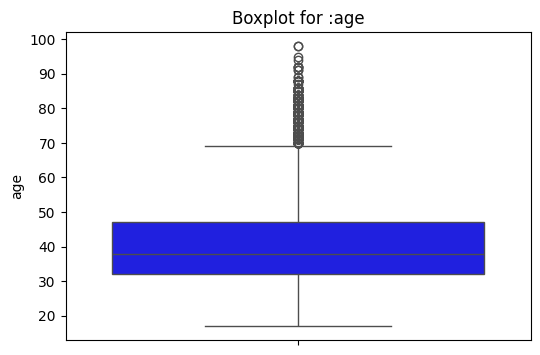

Skewness of duration is 3.2628075094947224


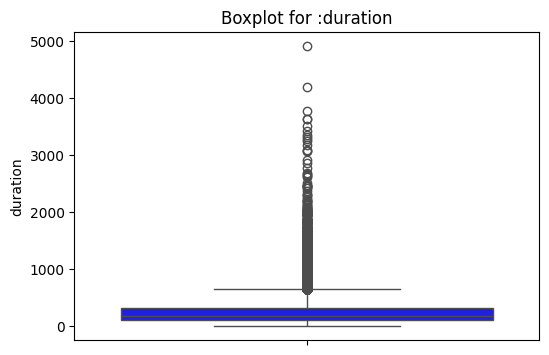

Skewness of campaign is 4.76204406111779


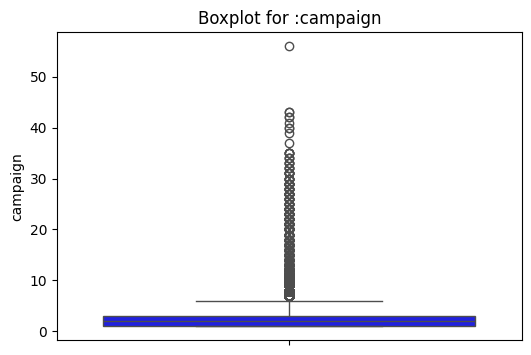

Skewness of pdays is -4.921386382079702


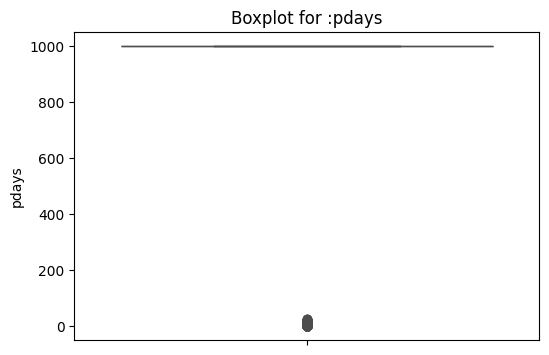

Skewness of previous is 3.831395514122408


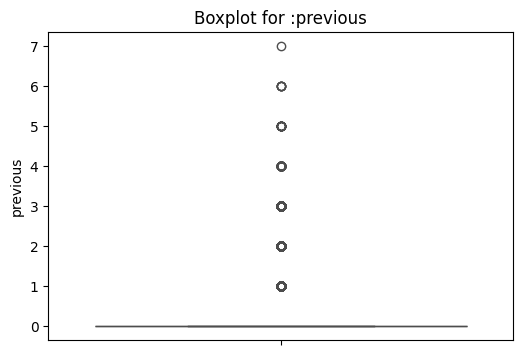

Skewness of emp.var.rate is -0.7240605917385105


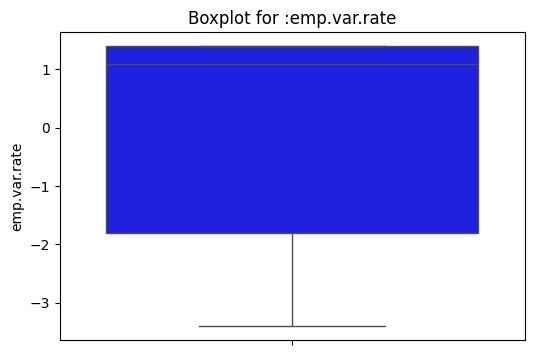

Skewness of cons.price.idx is -0.23085290676680506


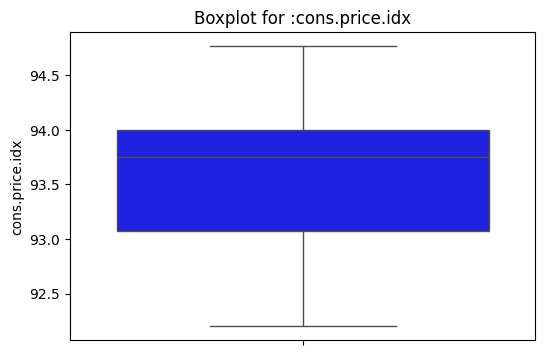

Skewness of cons.conf.idx is 0.3028760001292554


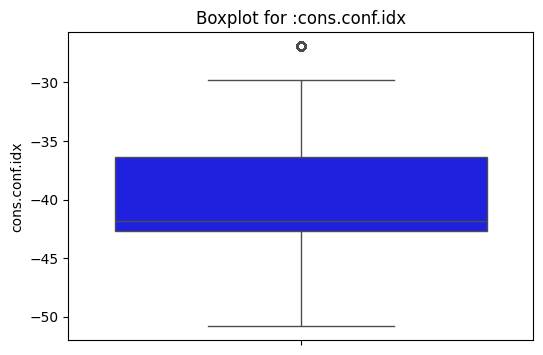

Skewness of euribor3m is -0.7091942125590542


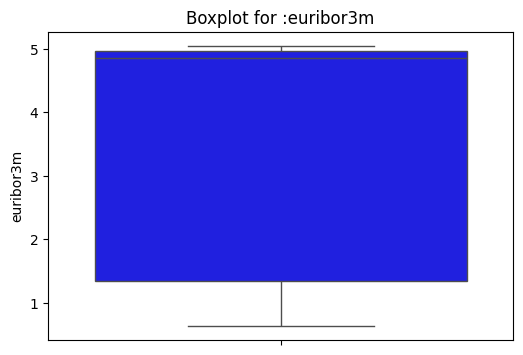

Skewness of nr.employed is -1.0443170571755054


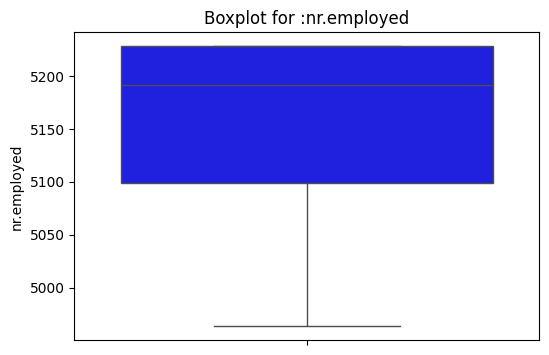

In [13]:
# Draw Boxplot to find the outliers in numerical columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_col:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=data[numerical_col][i],color='blue')
  plt.title('Boxplot for :'+ i)
  print('\033[1m' + f"Skewness of {i} is {data[numerical_col][i].skew()}"+ '\033[0m')
  plt.show()

In [14]:
# The outliers are present in the following columns
# 1. age            -- This is positively skewed, mean > median
# 2. duration       -- This is positively skewed, mean > median
# 3. campaign       -- This is positively skewed, mean > median
# 4. pdays          -- This is negatively skewed, mean < median
# 5. previous       -- This is positively skewed, mean > median
# 6. cons.conf.idx  -- This is positivley skewed, mean > median

In [15]:
# Function to handle the outliers in the numerical columns of the new dataset
def handle_outliers_numeric(data, numeric_cols):
  for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    # use .loc to modify safely
    # In the below code,
    # : - means all rows
    # col - only this column
    data.loc[:, col] = data[col].clip(LL,UL)

  return data

In [16]:
# Call the function - handle_outliers_numeric(data, numeric_cols)
# This will cap the outliers in the dataset
handle_outliers_numeric(data, numerical_col)

/tmp/ipython-input-676249777.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[56.  57.  37.  ... 56.  44.  69.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, col] = data[col].clip(LL,UL)
/tmp/ipython-input-676249777.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[261. 149. 226. ... 189. 442. 239.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, col] = data[col].clip(LL,UL)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Skewness of age is 0.5673961492615673


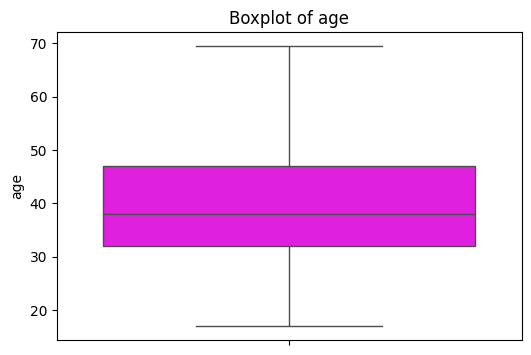

Skewness of duration is 1.0446884076408367


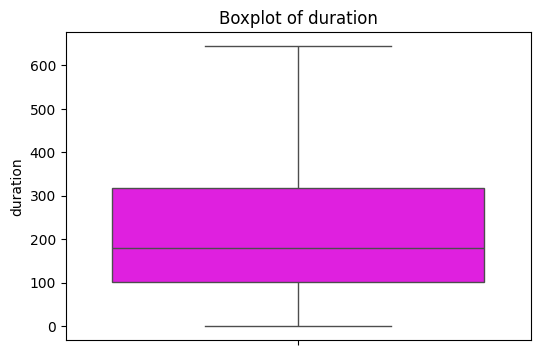

Skewness of campaign is 1.211974233852984


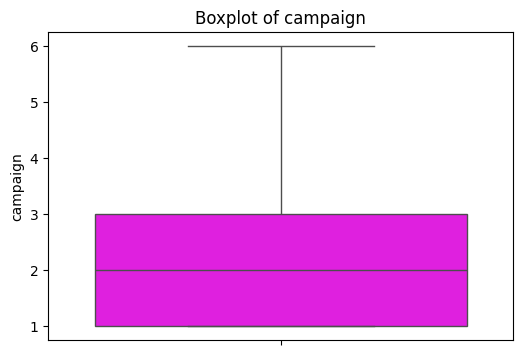

Skewness of pdays is 0.0


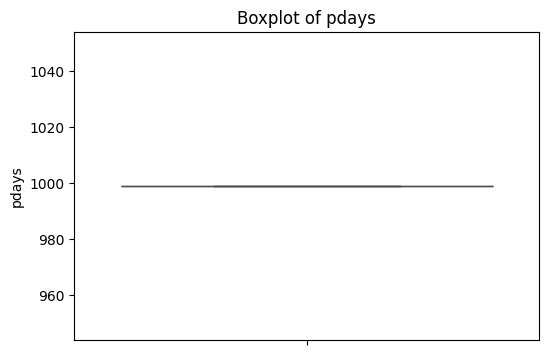

Skewness of previous is 0.0


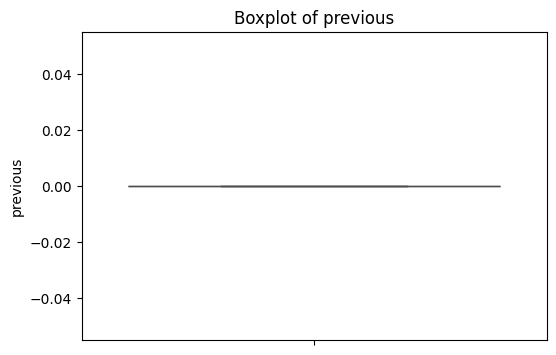

Skewness of emp.var.rate is -0.7240605917385105


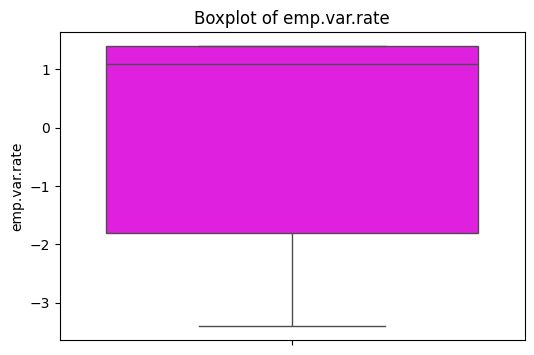

Skewness of cons.price.idx is -0.23085290676680506


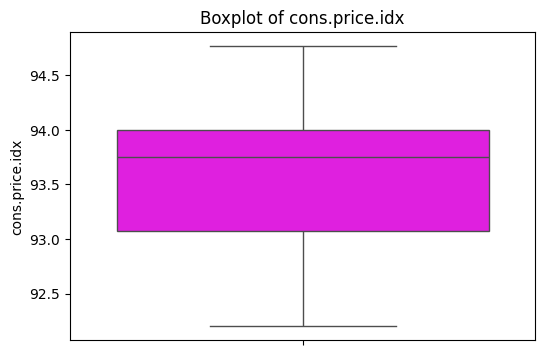

Skewness of cons.conf.idx is 0.30051406243977435


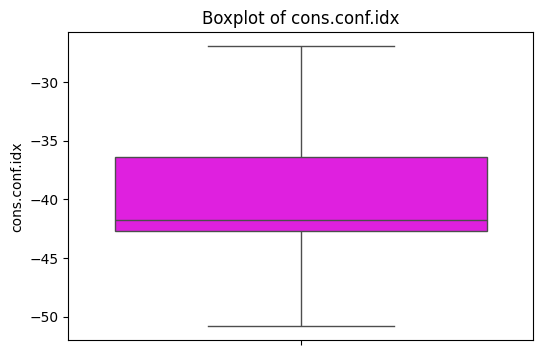

Skewness of euribor3m is -0.7091942125590542


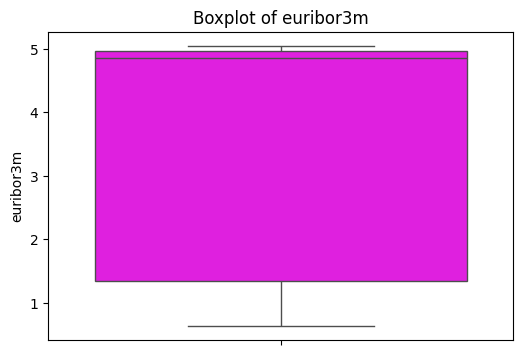

Skewness of nr.employed is -1.0443170571755054


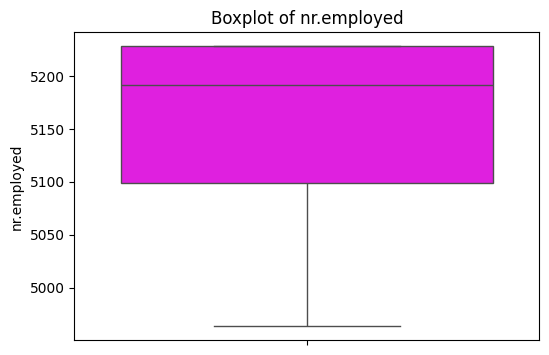

In [17]:
# Check again the Boxplot for outliers after the outlier cap in the numerical columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_col:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=data[numerical_col][i],color='magenta')
  plt.title('Boxplot of '+ i)
  print('\033[1m' + f"Skewness of {i} is {data[numerical_col][i].skew()}"+ '\033[0m')
  plt.show()

# Now there are no outliers in the numerical columns after the outlier cap

From the above skewness data, only the following columns required data transformation to adjust the skewness
1. duration
2. campaign

The above 2 columns are positively skewed

1. emp.var.rate
2. euribor3m
3. nr.employed

The above 3 columns are negatively skewed

1. For duration & campaign, the current skewness is between 1 and 2, so we can use cube root transformation
2. For emp.var.rate, euribor3m & nr.employed, the current skewness is between -1 and -0.5, we can use power transformation

In [22]:
# For duration & campaign, the current skewness is > 1, we can use cube root transformation
import numpy as np

data["duration"] = np.cbrt(data["duration"])
data["campaign"] = np.cbrt(data["campaign"])

In [23]:
# After applying transformation, the skewness in the Columns - duration & campaign
print("The skewness of duration is: ",data["duration"].skew())
print("The skewness of campaign is: ",data["campaign"].skew())

The skewness of duration is:  -3.0755600768364193
The skewness of campaign is:  0.49367014414495763


In [24]:
# For emp.var.rate & nr.employed, the current skewness is between -1 and -0.5
import numpy as np

cols = ['nr.employed', 'emp.var.rate']

for col in cols:
    max_val = data[col].max()
    data[col] = np.log1p(max_val - data[col])

# Check skewness after transformation
print(data[cols].skew())

nr.employed    -0.233782
emp.var.rate    0.446073
dtype: float64


In [27]:
# For euribor3m, the current skewness is between -1 and -0.5, we can use power transformation
# Apply square transformation
data["euribor3m"] = np.power(data["euribor3m"], 2)

# Check skewness
print("The skewness of euribor3m is: ",data["euribor3m"].skew())

The skewness of euribor3m is:  -0.3416173571408099


#**Data Visualization/ Analysis**

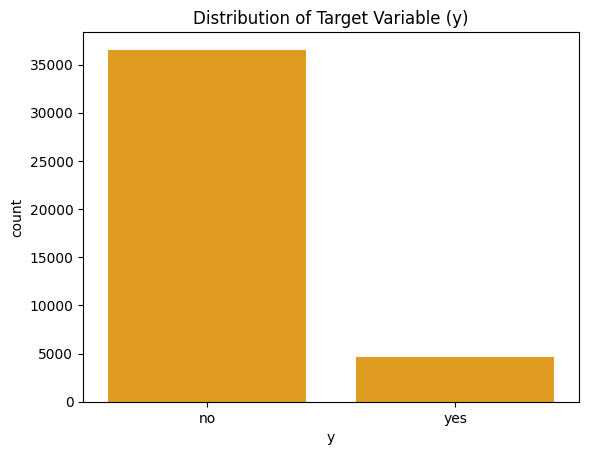

In [28]:
# Using countplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='y', data=data, color="orange")
plt.title('Distribution of Target Variable (y)')
plt.show()

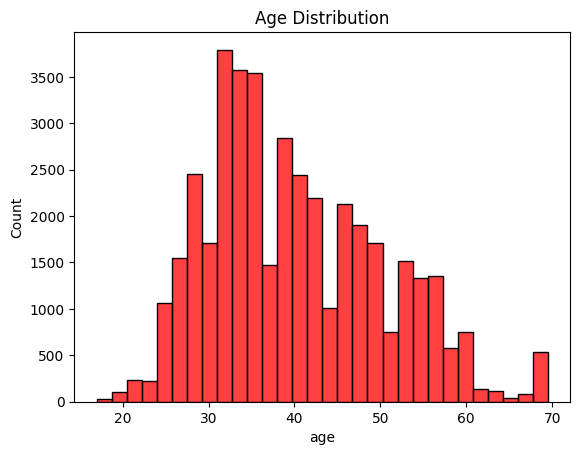

In [29]:
# Using histplot
plt.figure()
sns.histplot(data['age'], bins=30, color="red")
plt.title('Age Distribution')
plt.show()

/tmp/ipython-input-2135305896.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.countplot(x='job', hue='y', data=data, color="yellow")


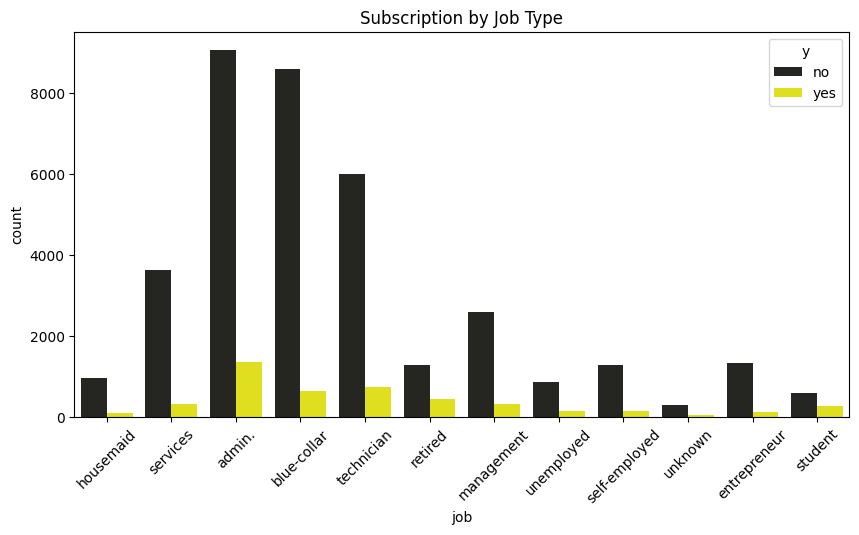

In [30]:
# Using countplot
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=data, color="yellow")
plt.xticks(rotation=45)
plt.title('Subscription by Job Type')
plt.show()


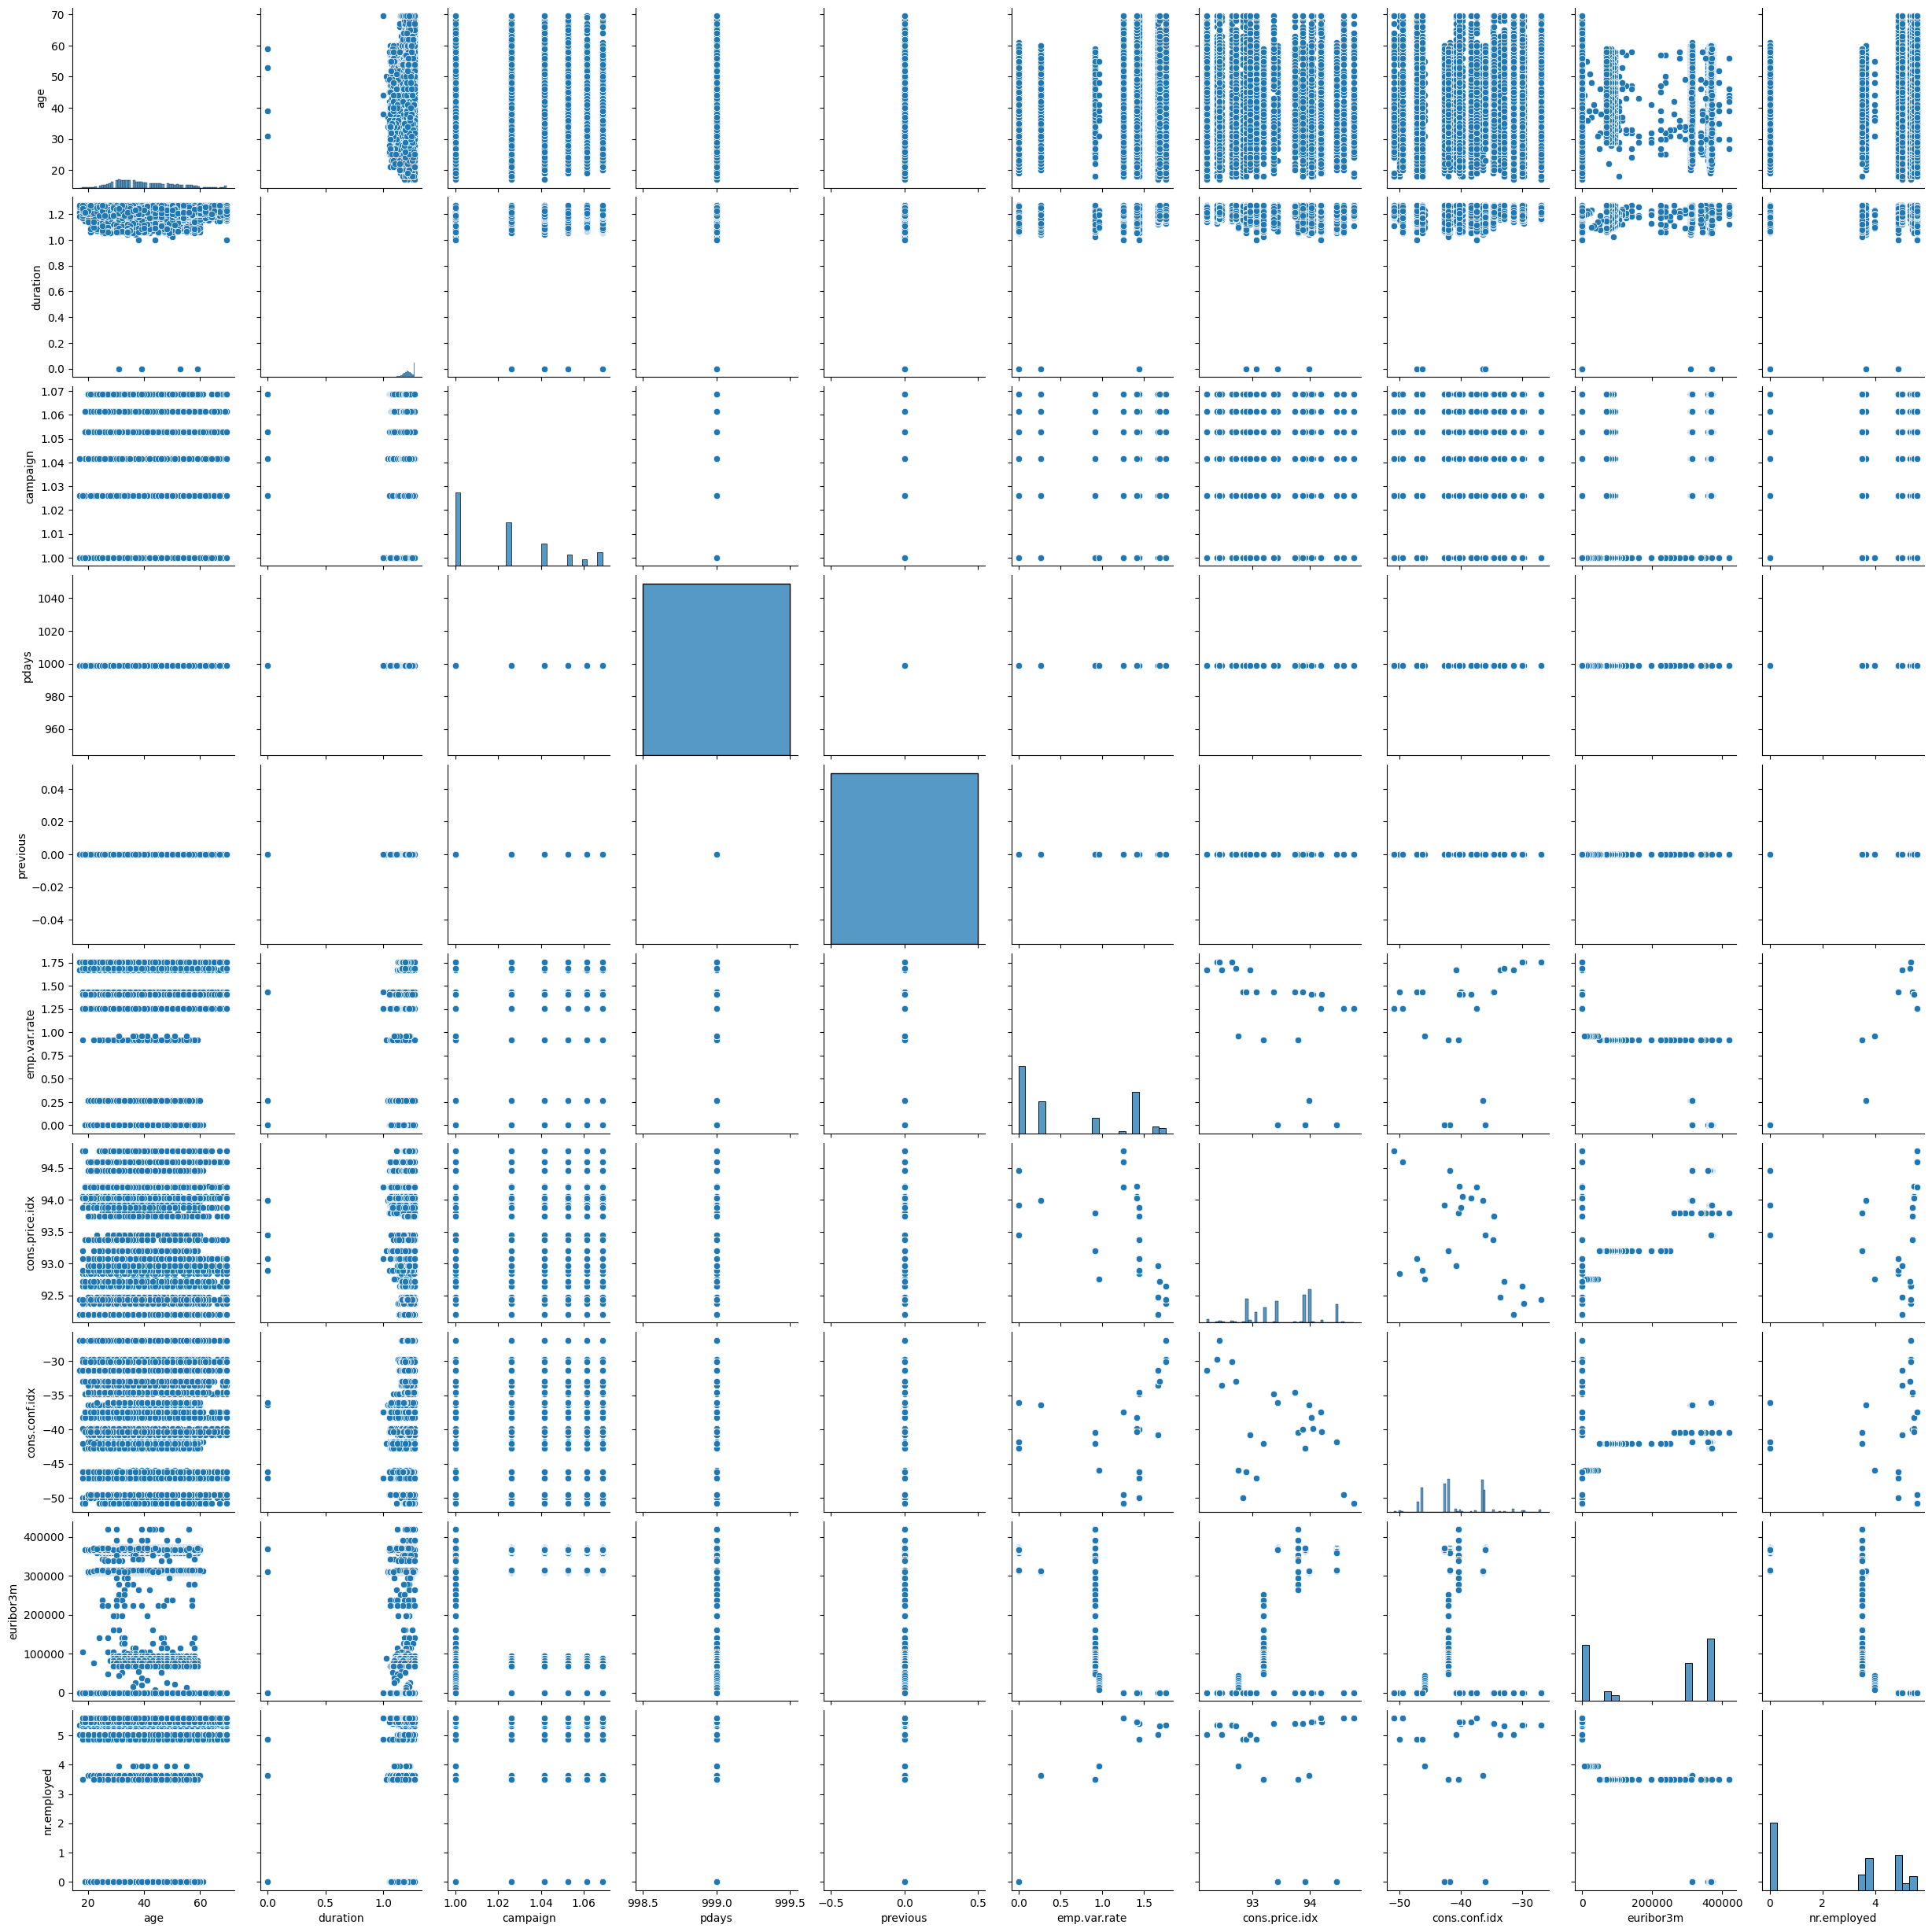

In [31]:
# Using pairplot()
sns.pairplot(data)
plt.show()

# **Data Engineering Steps**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assigning features into X and Target into y
X = data.drop('y', axis=1)
y = data['y']

# Separate column names
new_numerical_col = data.select_dtypes(include="number").columns.tolist()
new_categorical_col = [col for col in data.select_dtypes(include="object").columns if col != 'y']


# Preprocessing
preprocess = ColumnTransformer([
    ('num', StandardScaler(), new_numerical_col),
    ('cat', OneHotEncoder(drop='first'), new_categorical_col)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [34]:
# Checking for Class Imbalance
y.value_counts() # There is an imbalance

,count
y,
no,36537
yes,4639


<Axes: xlabel='y', ylabel='count'>

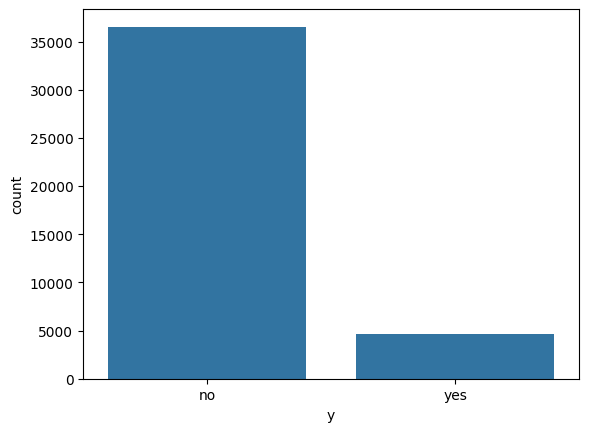

In [35]:
# Draw a countplot to display the imbalance
sns.countplot(x=data["y"])

In [36]:
# Calculating Imbalance Ratio
maj_cls = y.value_counts().max()
min_cls = y.value_counts().min()
ratio = maj_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 7.88


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
# Pipelines for Individual Models (with SelectKBest for LR, kNN, SVM)
pipe_lr = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('fs', SelectKBest(k=15)),
    ('model', LogisticRegression(max_iter=1000))
])

pipe_knn = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('fs', SelectKBest(k=15)),
    ('model', KNeighborsClassifier())
])

pipe_svc = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('fs', SelectKBest(k=15)),
    ('model', LinearSVC(max_iter=5000))
])

pipe_dt = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier())
])

In [39]:
# Pipelines for Ensemble Models (tree-based, no SelectKBest)
pipe_rf = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

pipe_bag = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', BaggingClassifier())
])

pipe_ada = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', AdaBoostClassifier())
])

pipe_gb = Pipeline([
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier())
])

In [40]:
# Dictionary of pipelines
pipelines = {
    'Logistic Regression': pipe_lr,
    'kNN': pipe_knn,
    'SVM': pipe_svc,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf,
    'Bagging': pipe_bag,
    'AdaBoost': pipe_ada,
    'Gradient Boosting': pipe_gb
}

In [41]:
# Model evaluation
results = []

for name, pipe in pipelines.items():
    # Train
    pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Metrics
    results.append({
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, pos_label='yes'),
        'Recall': recall_score(y_test, y_test_pred, pos_label='yes'),
        'F1-score': f1_score(y_test, y_test_pred, pos_label='yes')
    })

results_df = pd.DataFrame(results).sort_values('Test Accuracy', ascending=False)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/l

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
4,Random Forest,0.999879,0.906022,0.581915,0.589440,0.585653
5,Bagging,0.995932,0.895945,0.535253,0.580819,0.557106
7,Gradient Boosting,0.884942,0.884288,0.492260,0.856681,0.625246
3,Decision Tree,0.999879,0.883803,0.486461,0.561422,0.521261
1,kNN,0.902854,0.869961,0.451657,0.719828,0.555048
6,AdaBoost,0.866697,0.865833,0.448932,0.838362,0.584743
0,Logistic Regression,0.849484,0.849806,0.422088,0.901940,0.575060
2,SVM,0.843352,0.842885,0.411079,0.911638,0.566644


# Model Selection and Interpretation
1. Identify the best-performing model.
2. Justify your choice based on evaluation metrics.
3. Explain which features influence customer subscription the most.
4. Provide business insights on how the bank can improve marketing campaigns.

1. Identify the best-performing model.
2. Justify your choice based on evaluation metrics.

    Based on the Train and Test accuracy
    1. Gradient Boosting
    2. Ada Boost
    3. Logistic Regression
    4. SVM

    are the best based on the order given above from top to bottom

    Based on the Precision and Recall
    1. Random Forest - Precision = 0.581, Recall = 0.589  
    
    This means more balanced



3. Explain which features influence customer subscription the most.
    1.   Call duration: Longer calls increase chances of subscription.
    2.   Previous contacts: Customers who were contacted before are more likely to subscribe.
    3. Contact timing: Certain months or weekdays have better response rates.

4. Provide business insights on how the bank can improve marketing campaigns.
    1.   Make calls longer and more engaging to convince customers.
    2.   Focus on customers who were contacted before they respond better.
    3. Contact customers at the best time of week or month to improve subscriptions.